In [1]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
from pyspark.sql.window import Window
from pyspark.sql import functions as F

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1595276135799_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 49.2.0
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

In [3]:
sc.install_pypi_package("numpy==1.15", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached numpy-1.15.0-cp36-cp36m-manylinux1_x86_64.whl (13.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1595279025684-0
    Can't uninstall 'numpy'. No files were found to uninstall.

ERROR: python36-sagemaker-pyspark 1.2.6 requires pyspark==2.3.2, which is not installed.

In [5]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [6]:
sc.install_pypi_package("pandas==0.25.1", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl (10.5 MB)

In [7]:
import matplotlib
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
sum(confirmed) as numConfirmed, sum(deaths) as numDeaths,sum(recovered) as numRecovered,admin2,province_state, 
concat(admin2, ' - ', province_state) as county 
from covid19.jhu_daily_new
where year='2020' and int(month) > 3
and country_region = 'US' and 
( province_state = 'Virginia' or province_state = 'Maryland' or 
province_state = 'California' or province_state = 'Washington' or province_state = 'District of Columbia' ) 
group by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'),admin2,province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------+---------+------------+--------------------+--------------------+--------------------+
|               date|numConfirmed|numDeaths|numRecovered|              admin2|      province_state|              county|
+-------------------+------------+---------+------------+--------------------+--------------------+--------------------+
|2020-04-01 00:00:00|        3518|       64|           0|         Los Angeles|          California|Los Angeles - Cal...|
|2020-04-01 00:00:00|        2330|      150|           0|                King|          Washington|   King - Washington|
|2020-04-01 00:00:00|        1304|       40|           0|           Snohomish|          Washington|Snohomish - Washi...|
|2020-04-01 00:00:00|         956|       32|           0|         Santa Clara|          California|Santa Clara - Cal...|
|2020-04-01 00:00:00|         733|        9|           0|           San Diego|          California|San Diego - Calif...|
|2020-04-01 00:00:00|         60

In [9]:
df_p=df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
plt.figure(figsize=(20,10))
plt.plot('date','numConfirmed',data=df_p.loc[(df_p['admin2'] == 'Fairfax') & (df_p['province_state'] == 'Virginia')],label="Fairfax")
plt.plot('date','numConfirmed',data=df_p.loc[(df_p['admin2'] == 'Montgomery') & (df_p['province_state'] == 'Maryland')],label="Montgomery")
plt.legend()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

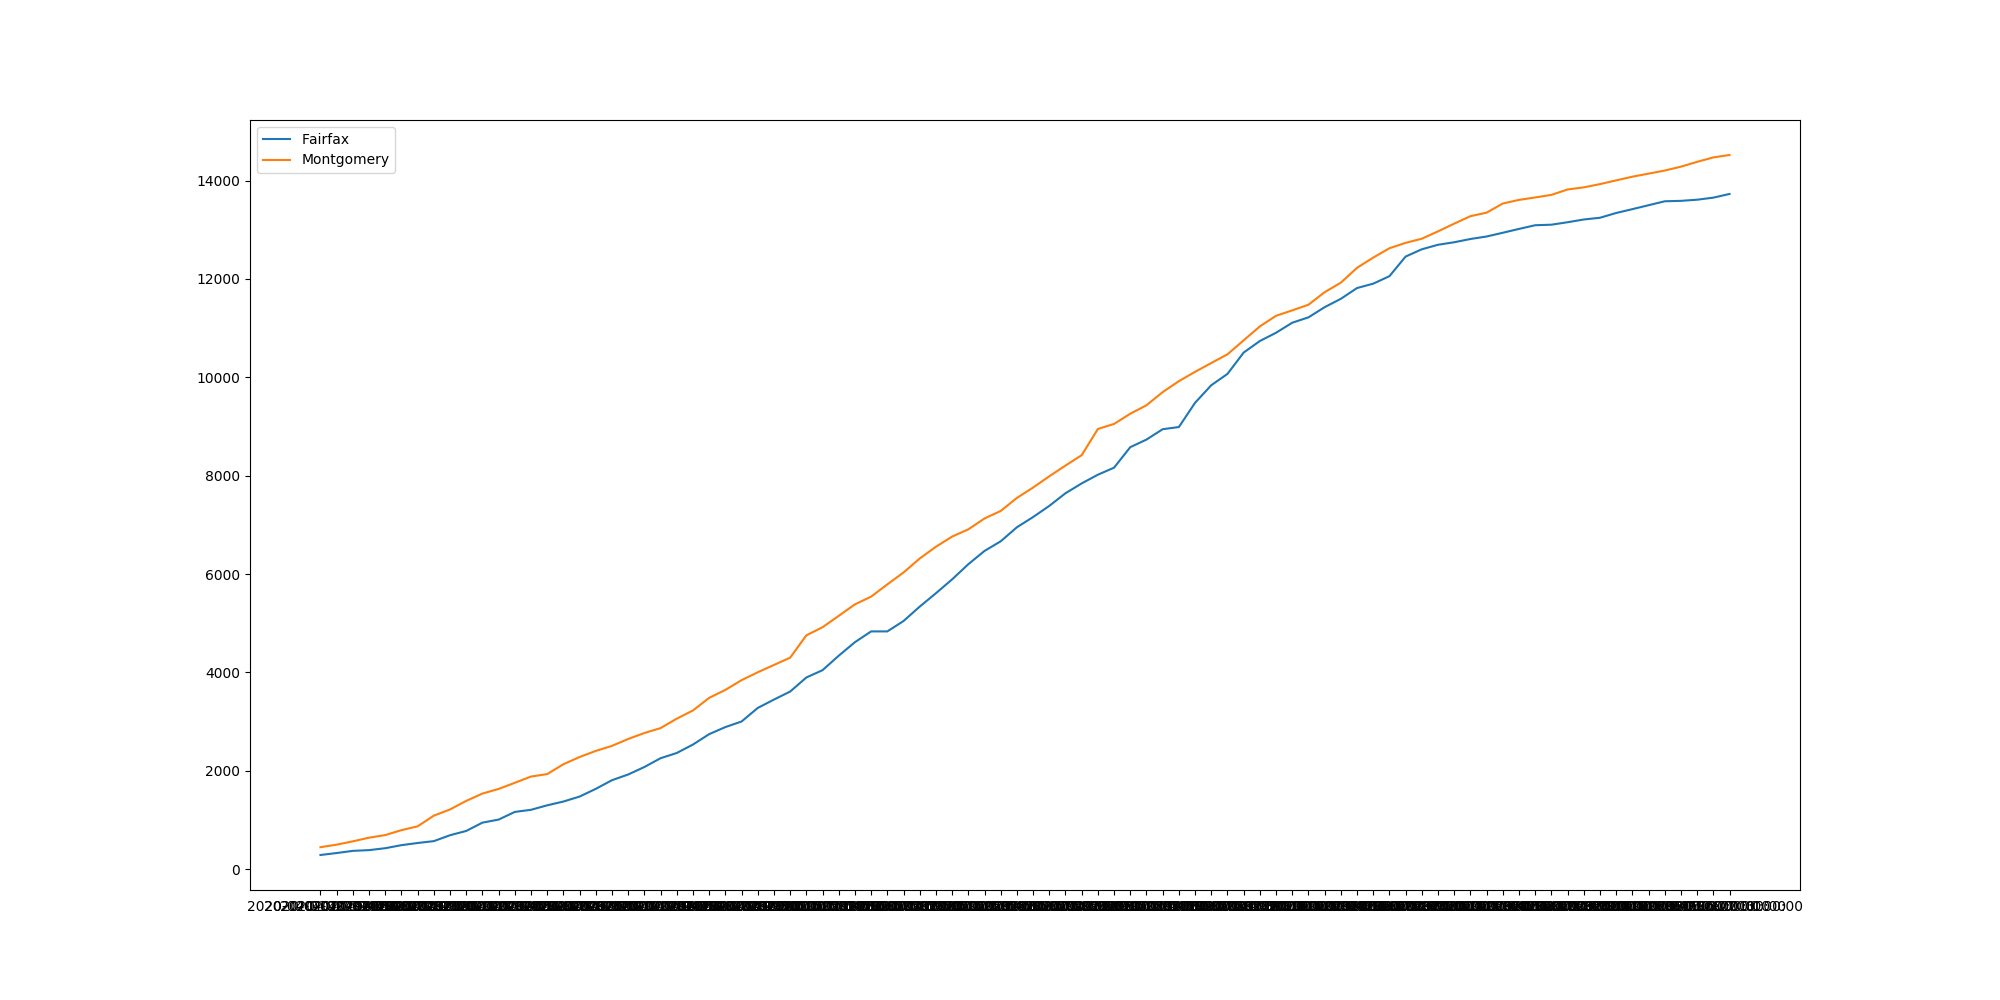

In [11]:
%matplot plt

In [12]:
df_fairfax = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
admin2 as county, sum(confirmed) as numConfirmed, sum(deaths) as numDeaths
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'US' and 
( province_state = 'Virginia' ) and ( admin2 = 'Fairfax' ) 
group by admin2, unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'),admin2,province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_fairfax.show(df_fairfax.count(), False)

my_window = Window.partitionBy().orderBy("date")

df_fairfax = df_fairfax.withColumn("dayBefore", F.lag(df_fairfax.numConfirmed).over(my_window))
df_fairfax = df_fairfax.withColumn("change", F.when(F.isnull(df_fairfax.numConfirmed - df_fairfax.dayBefore), 0).otherwise(df_fairfax.numConfirmed - df_fairfax.dayBefore))

df_fairfax = df_fairfax.withColumn("dayBeforeDeaths", F.lag(df_fairfax.numDeaths).over(my_window))
df_fairfax = df_fairfax.withColumn("changeDeaths", F.when(F.isnull(df_fairfax.numDeaths - df_fairfax.dayBeforeDeaths), 0).otherwise(df_fairfax.numDeaths - df_fairfax.dayBeforeDeaths))


df_fairfax.show(df_fairfax.count(), False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+------------+---------+
|date               |county |numConfirmed|numDeaths|
+-------------------+-------+------------+---------+
|2020-03-22 00:00:00|Fairfax|31          |1        |
|2020-03-23 00:00:00|Fairfax|43          |1        |
|2020-03-24 00:00:00|Fairfax|46          |1        |
|2020-03-25 00:00:00|Fairfax|76          |1        |
|2020-03-26 00:00:00|Fairfax|79          |1        |
|2020-03-27 00:00:00|Fairfax|124         |1        |
|2020-03-28 00:00:00|Fairfax|156         |2        |
|2020-03-29 00:00:00|Fairfax|188         |2        |
|2020-03-30 00:00:00|Fairfax|224         |2        |
|2020-03-31 00:00:00|Fairfax|244         |2        |
|2020-04-01 00:00:00|Fairfax|288         |2        |
|2020-04-02 00:00:00|Fairfax|328         |2        |
|2020-04-03 00:00:00|Fairfax|372         |2        |
|2020-04-04 00:00:00|Fairfax|387         |2        |
|2020-04-05 00:00:00|Fairfax|426         |2        |
|2020-04-06 00:00:00|Fairfax|488         |2   

In [13]:
df_arlington = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
admin2 as county, sum(confirmed) as numConfirmed, sum(deaths) as numDeaths 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'US' and 
( province_state = 'Virginia' ) and ( admin2 = 'Arlington' ) 
group by admin2, unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'),admin2,province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_arlington.show()

my_window = Window.partitionBy().orderBy("date")

df_arlington = df_arlington.withColumn("dayBefore", F.lag(df_arlington.numConfirmed).over(my_window))
df_arlington = df_arlington.withColumn("change", F.when(F.isnull(df_arlington.numConfirmed - df_arlington.dayBefore), 0).otherwise(df_arlington.numConfirmed - df_arlington.dayBefore))

df_arlington = df_arlington.withColumn("dayBeforeDeaths", F.lag(df_arlington.numDeaths).over(my_window))
df_arlington = df_arlington.withColumn("changeDeaths", F.when(F.isnull(df_arlington.numDeaths - df_arlington.dayBeforeDeaths), 0).otherwise(df_arlington.numDeaths - df_arlington.dayBeforeDeaths))


df_arlington.show(df_arlington.count(), False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+---------+------------+---------+
|               date|   county|numConfirmed|numDeaths|
+-------------------+---------+------------+---------+
|2020-03-22 00:00:00|Arlington|          26|        0|
|2020-03-23 00:00:00|Arlington|          34|        0|
|2020-03-24 00:00:00|Arlington|          36|        0|
|2020-03-25 00:00:00|Arlington|          46|        0|
|2020-03-26 00:00:00|Arlington|          54|        0|
|2020-03-27 00:00:00|Arlington|          63|        0|
|2020-03-28 00:00:00|Arlington|          75|        0|
|2020-03-29 00:00:00|Arlington|          84|        2|
|2020-03-30 00:00:00|Arlington|          86|        2|
|2020-03-31 00:00:00|Arlington|         104|        2|
|2020-04-01 00:00:00|Arlington|         119|        2|
|2020-04-02 00:00:00|Arlington|         128|        2|
|2020-04-03 00:00:00|Arlington|         135|        2|
|2020-04-04 00:00:00|Arlington|         150|        2|
|2020-04-05 00:00:00|Arlington|         181|        2|
|2020-04-0

In [14]:
df_montgomery = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
admin2 as county, sum(confirmed) as numConfirmed, sum(deaths) as numDeaths  
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'US' and 
( province_state = 'Maryland' ) and ( admin2 = 'Montgomery' ) 
group by admin2, unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'),admin2,province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_montgomery.show()

my_window = Window.partitionBy().orderBy("date")

df_montgomery = df_montgomery.withColumn("dayBefore", F.lag(df_montgomery.numConfirmed).over(my_window))
df_montgomery = df_montgomery.withColumn("change", F.when(F.isnull(df_montgomery.numConfirmed - df_montgomery.dayBefore), 0).otherwise(df_montgomery.numConfirmed - df_montgomery.dayBefore))

df_montgomery = df_montgomery.withColumn("dayBeforeDeaths", F.lag(df_montgomery.numDeaths).over(my_window))
df_montgomery = df_montgomery.withColumn("changeDeaths", F.when(F.isnull(df_montgomery.numDeaths - df_montgomery.dayBeforeDeaths), 0).otherwise(df_montgomery.numDeaths - df_montgomery.dayBeforeDeaths))


df_montgomery.show(df_montgomery.count(), False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+------------+---------+
|               date|    county|numConfirmed|numDeaths|
+-------------------+----------+------------+---------+
|2020-03-22 00:00:00|Montgomery|          83|        1|
|2020-03-23 00:00:00|Montgomery|          94|        1|
|2020-03-24 00:00:00|Montgomery|         107|        1|
|2020-03-25 00:00:00|Montgomery|         127|        1|
|2020-03-26 00:00:00|Montgomery|         164|        1|
|2020-03-27 00:00:00|Montgomery|         208|        1|
|2020-03-28 00:00:00|Montgomery|         255|        1|
|2020-03-29 00:00:00|Montgomery|         301|        1|
|2020-03-30 00:00:00|Montgomery|         341|        1|
|2020-03-31 00:00:00|Montgomery|         388|        1|
|2020-04-01 00:00:00|Montgomery|         447|        1|
|2020-04-02 00:00:00|Montgomery|         498|        6|
|2020-04-03 00:00:00|Montgomery|         566|        9|
|2020-04-04 00:00:00|Montgomery|         640|        9|
|2020-04-05 00:00:00|Montgomery|         693|   

In [15]:
df_dc = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
admin2 as county, sum(confirmed) as numConfirmed, sum(deaths) as numDeaths 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'US' and 
( province_state = 'District of Columbia' )
group by admin2, unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'),admin2,province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_dc.show()

my_window = Window.partitionBy().orderBy("date")

df_dc = df_dc.withColumn("dayBefore", F.lag(df_dc.numConfirmed).over(my_window))
df_dc = df_dc.withColumn("change", F.when(F.isnull(df_dc.numConfirmed - df_dc.dayBefore), 0).otherwise(df_dc.numConfirmed - df_dc.dayBefore))

df_dc = df_dc.withColumn("dayBeforeDeaths", F.lag(df_dc.numDeaths).over(my_window))
df_dc = df_dc.withColumn("changeDeaths", F.when(F.isnull(df_dc.numDeaths - df_dc.dayBeforeDeaths), 0).otherwise(df_dc.numDeaths - df_dc.dayBeforeDeaths))


df_dc.show(df_dc.count(), False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------------+------------+---------+
|               date|              county|numConfirmed|numDeaths|
+-------------------+--------------------+------------+---------+
|2020-03-22 00:00:00|District of Columbia|         204|        2|
|2020-03-23 00:00:00|District of Columbia|         120|        2|
|2020-03-24 00:00:00|District of Columbia|         141|        2|
|2020-03-25 00:00:00|District of Columbia|         187|        2|
|2020-03-26 00:00:00|District of Columbia|         231|        3|
|2020-03-27 00:00:00|District of Columbia|         271|        3|
|2020-03-28 00:00:00|District of Columbia|         304|        4|
|2020-03-29 00:00:00|District of Columbia|         342|        5|
|2020-03-30 00:00:00|District of Columbia|         401|        9|
|2020-03-31 00:00:00|District of Columbia|         495|        9|
|2020-04-01 00:00:00|District of Columbia|         586|        9|
|2020-04-02 00:00:00|District of Columbia|         653|       12|
|2020-04-0

In [16]:
df_fairfax_p = df_fairfax.toPandas()
df_arlington_p = df_arlington.toPandas()
df_montgomery_p = df_montgomery.toPandas()
df_dc_p = df_dc.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
plt.figure(figsize=(20,20))
plt.plot('date', 'numConfirmed', data=df_fairfax_p, label="Fairfax - Confirmed Cases")
plt.plot('date', 'change', data=df_fairfax_p, label="Fairfax - Change from day before")
plt.plot('date', 'numConfirmed', data=df_arlington_p, label="Arlington - Confirmed Cases")
plt.plot('date', 'change', data=df_arlington_p, label="Arlington - Change from day before")
plt.plot('date', 'numConfirmed', data=df_montgomery_p, label="Montgomery - Confirmed Cases")
plt.plot('date', 'change', data=df_montgomery_p, label="Montgomery - Change from day before")
plt.plot('date', 'numConfirmed', data=df_dc_p, label="Washington, DC - Confirmed Cases")
plt.plot('date', 'change', data=df_dc_p, label="Washington, DC - Change from day before")
plt.text
plt.legend()
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

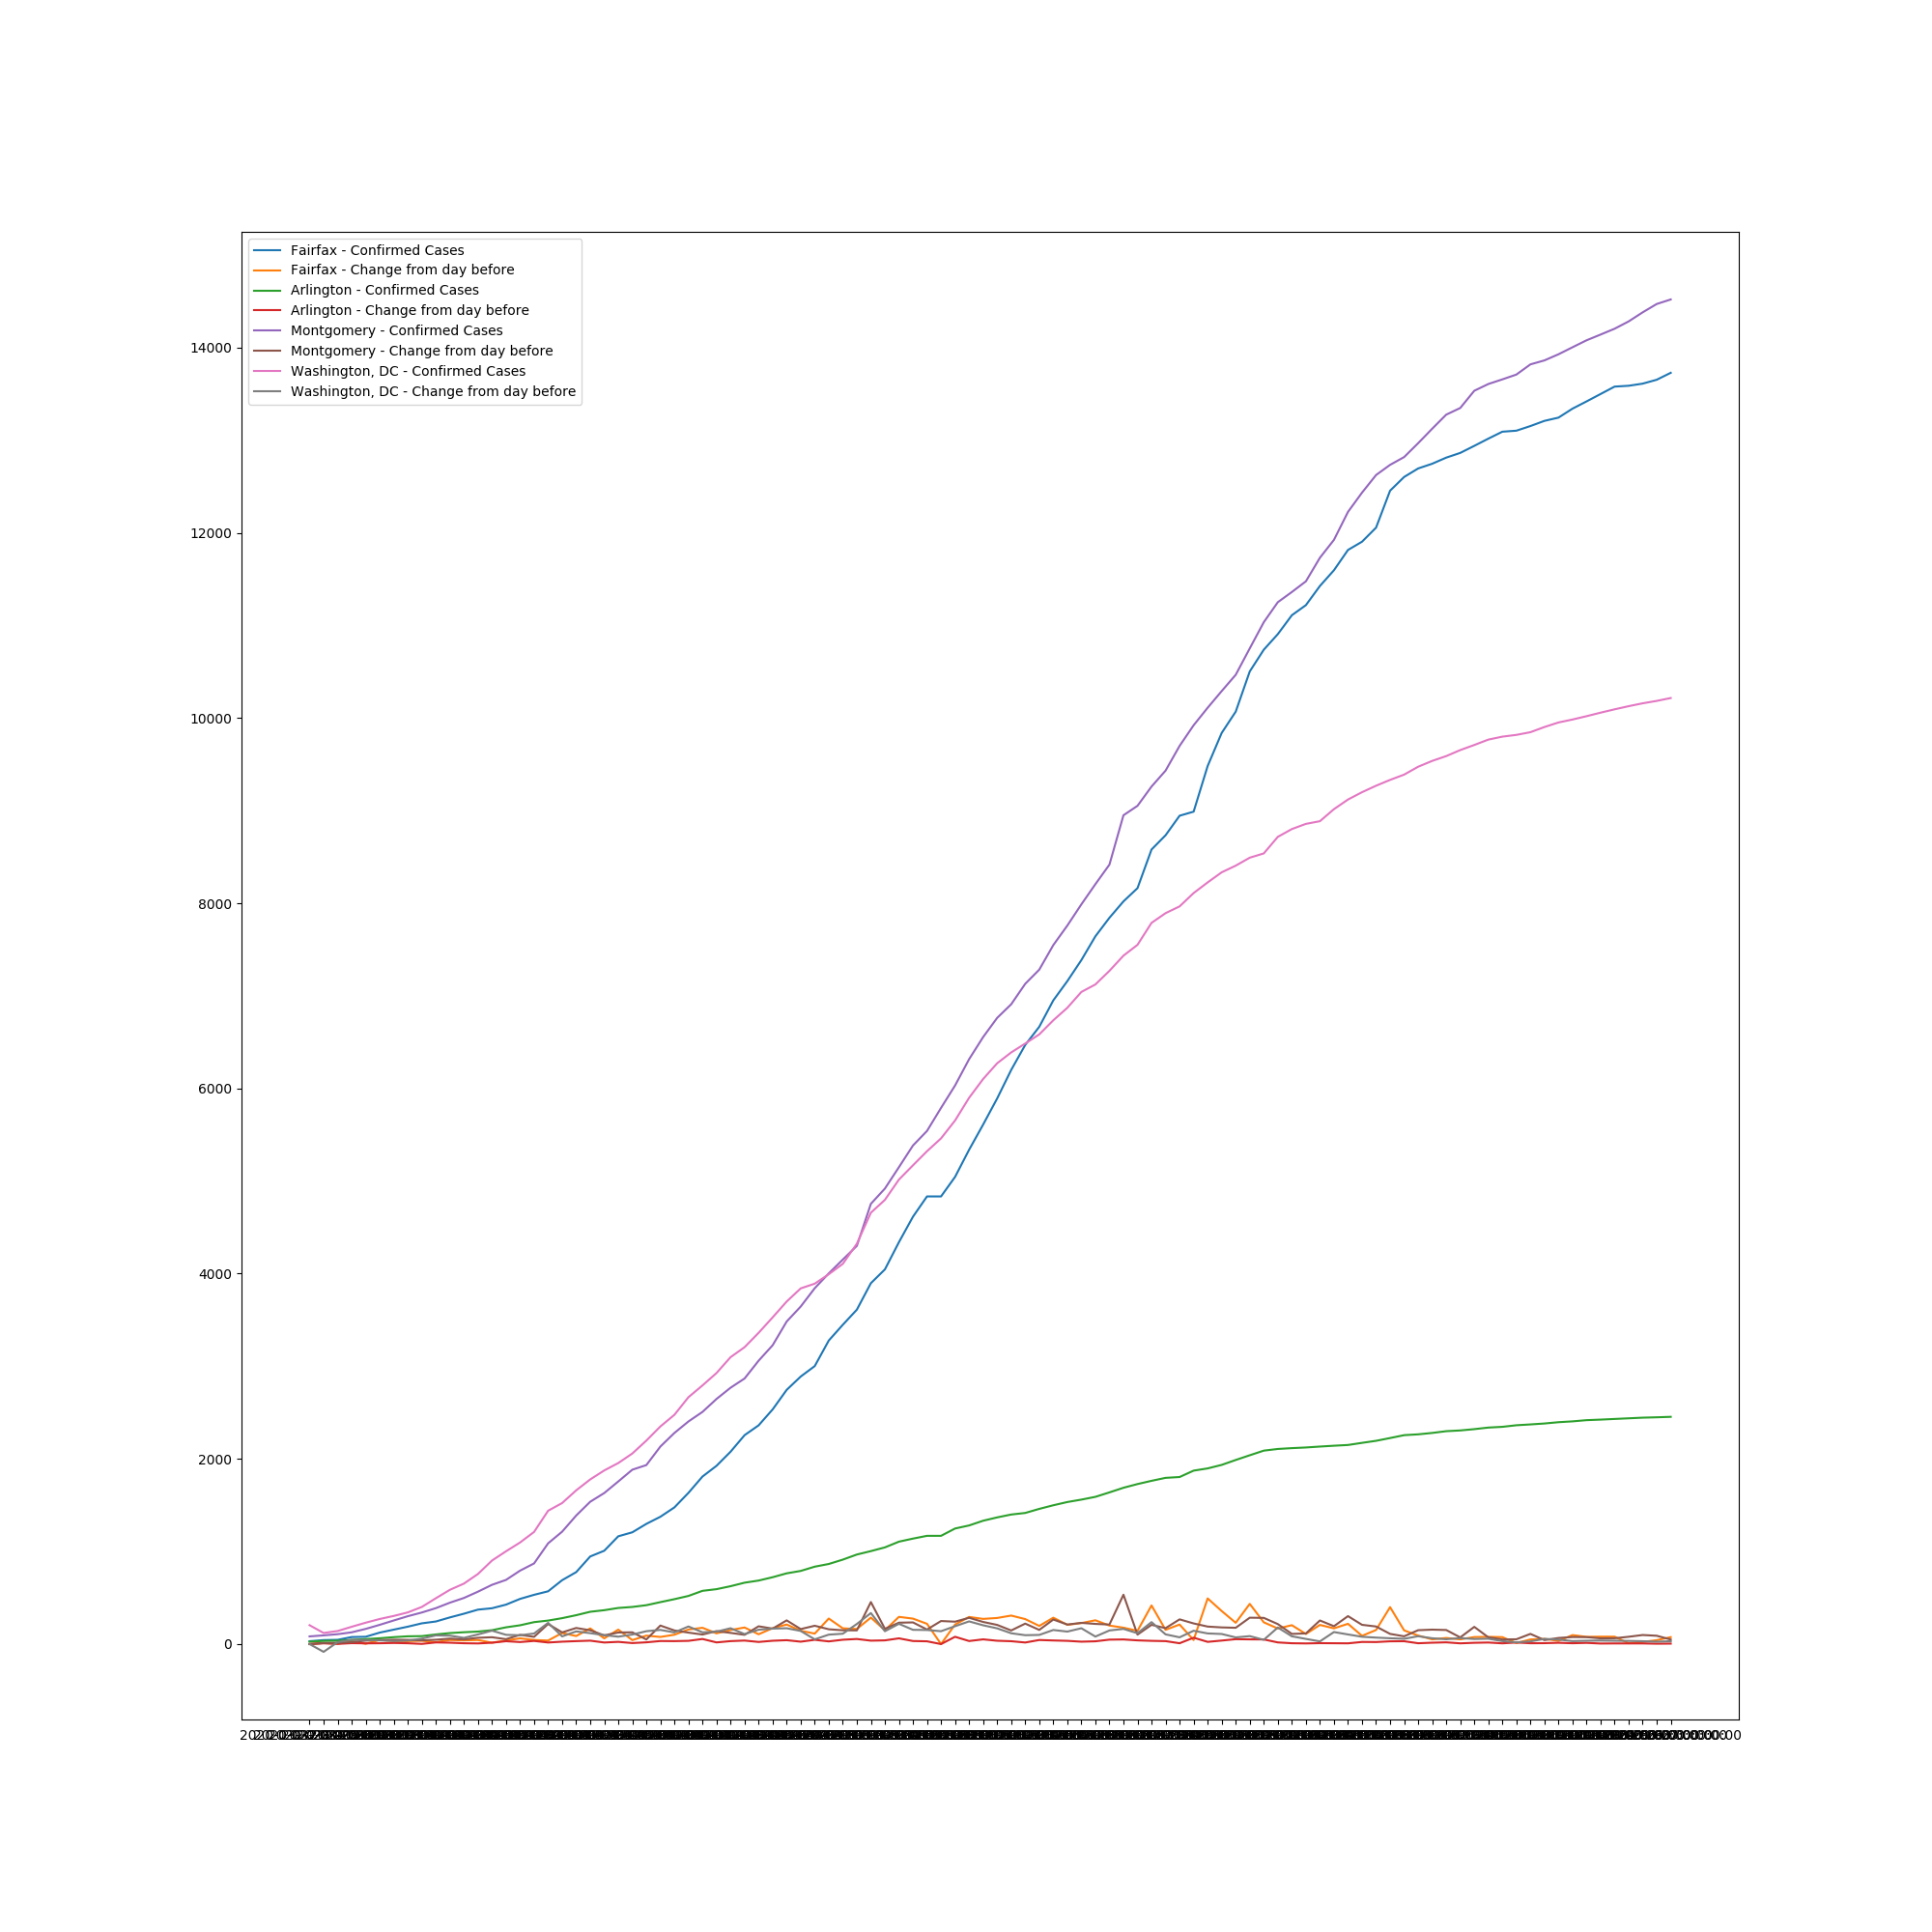

In [18]:
%matplot plt

In [19]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
df_states_dmv = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date,
sum(confirmed) as numConfirmed, sum(deaths) as numDeaths, province_state  
from covid19.jhu_daily_new
where year = '2020' and int(month) > 2 and
( province_state = 'Virginia' or province_state = 'Maryland' or province_state = 'District of Columbia' )
group by year, month, day, province_state
order by year, month, day, sum(confirmed) desc""")
df_states_dmv.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------+---------+--------------------+
|               date|numConfirmed|numDeaths|      province_state|
+-------------------+------------+---------+--------------------+
|2020-03-22 00:00:00|         244|        3|            Maryland|
|2020-03-22 00:00:00|         220|        6|            Virginia|
|2020-03-22 00:00:00|         204|        2|District of Columbia|
|2020-03-23 00:00:00|         290|        3|            Maryland|
|2020-03-23 00:00:00|         254|        6|            Virginia|
|2020-03-23 00:00:00|         120|        2|District of Columbia|
|2020-03-24 00:00:00|         349|        4|            Maryland|
|2020-03-24 00:00:00|         293|        9|            Virginia|
|2020-03-24 00:00:00|         141|        2|District of Columbia|
|2020-03-25 00:00:00|         425|        4|            Maryland|
|2020-03-25 00:00:00|         396|        9|            Virginia|
|2020-03-25 00:00:00|         187|        2|District of Columbia|
|2020-03-2

In [20]:
df_states_dmv_p = df_states_dmv.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
plt.figure(figsize=(20,10))
plt.plot('date', 'numConfirmed', data=df_states_dmv_p.loc[df_states_dmv_p['province_state'] == 'Virginia'], label="Virginia - Confirmed Cases")
plt.plot('date', 'numConfirmed', data=df_states_dmv_p.loc[df_states_dmv_p['province_state'] == 'Maryland'], label="Maryland- Confirmed Cases")
plt.plot('date', 'numConfirmed', data=df_states_dmv_p.loc[df_states_dmv_p['province_state'] == 'District of Columbia'], label="DC - Confirmed Cases")
plt.text
plt.legend()
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

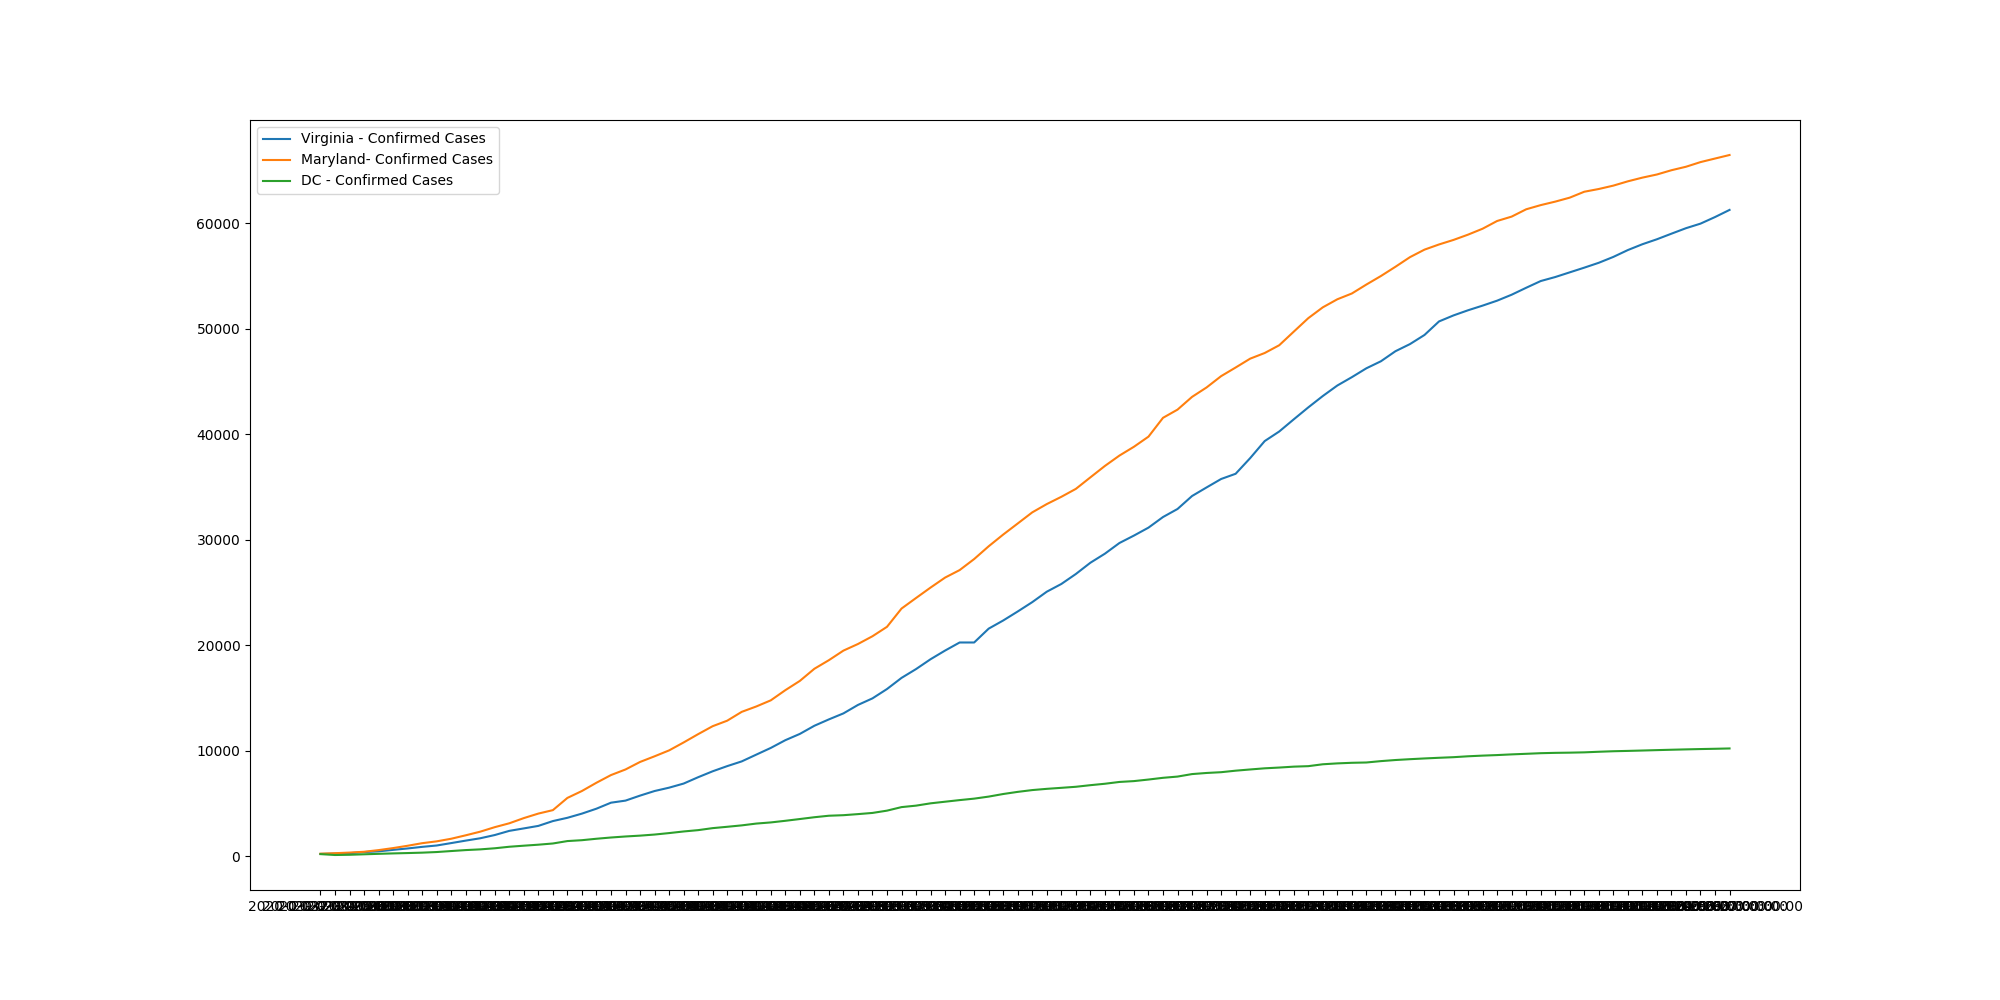

In [22]:
%matplot plt

In [23]:
df_dmv = df_fairfax.union(df_arlington).union(df_montgomery).union(df_dc)
movAvgSpec = Window.partitionBy("county").orderBy("date").rowsBetween(-7,0)

df_dmv_movAvg_seven = df_dmv.withColumn( "movingAverage", F.avg("change").over(movAvgSpec) )
df_dmv_movAvg_seven.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+------------+---------+---------+------+---------------+------------+------------------+
|               date|    county|numConfirmed|numDeaths|dayBefore|change|dayBeforeDeaths|changeDeaths|     movingAverage|
+-------------------+----------+------------+---------+---------+------+---------------+------------+------------------+
|2020-03-22 00:00:00|Montgomery|          83|        1|     null|     0|           null|           0|               0.0|
|2020-03-23 00:00:00|Montgomery|          94|        1|       83|    11|              1|           0|               5.5|
|2020-03-24 00:00:00|Montgomery|         107|        1|       94|    13|              1|           0|               8.0|
|2020-03-25 00:00:00|Montgomery|         127|        1|      107|    20|              1|           0|              11.0|
|2020-03-26 00:00:00|Montgomery|         164|        1|      127|    37|              1|           0|              16.2|
|2020-03-27 00:00:00|Montgomery|

In [24]:
df_dmv_counties = spark.sql("""select admin2 as county  
from covid19.jhu_daily_new 
where ( province_state = 'Virginia' and admin2 = 'Fairfax' ) or 
( province_state = 'Virginia' and admin2 = 'Arlington' ) or 
( province_state = 'Maryland' and admin2 = 'Montgomery' ) or 
province_state = 'District of Columbia'
group by county
""")
df_dmv_counties.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|              county|
+--------------------+
|          Montgomery|
|District of Columbia|
|           Arlington|
|             Fairfax|
+--------------------+

In [25]:
df_dmv_movAvg_seven_p = df_dmv_movAvg_seven.toPandas()
df_dmv_counties_p = df_dmv_counties.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
plt.figure(figsize=(20,20))
for index in df_dmv_counties_p.index:
  plt.plot('date', 'movingAverage', data=df_dmv_movAvg_seven_p.loc[df_dmv_movAvg_seven_p['county']==df_dmv_counties_p['county'][index]],label=df_dmv_counties_p['county'][index] + ' - 7 days Moving Averages')
  plt.text
plt.legend()
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

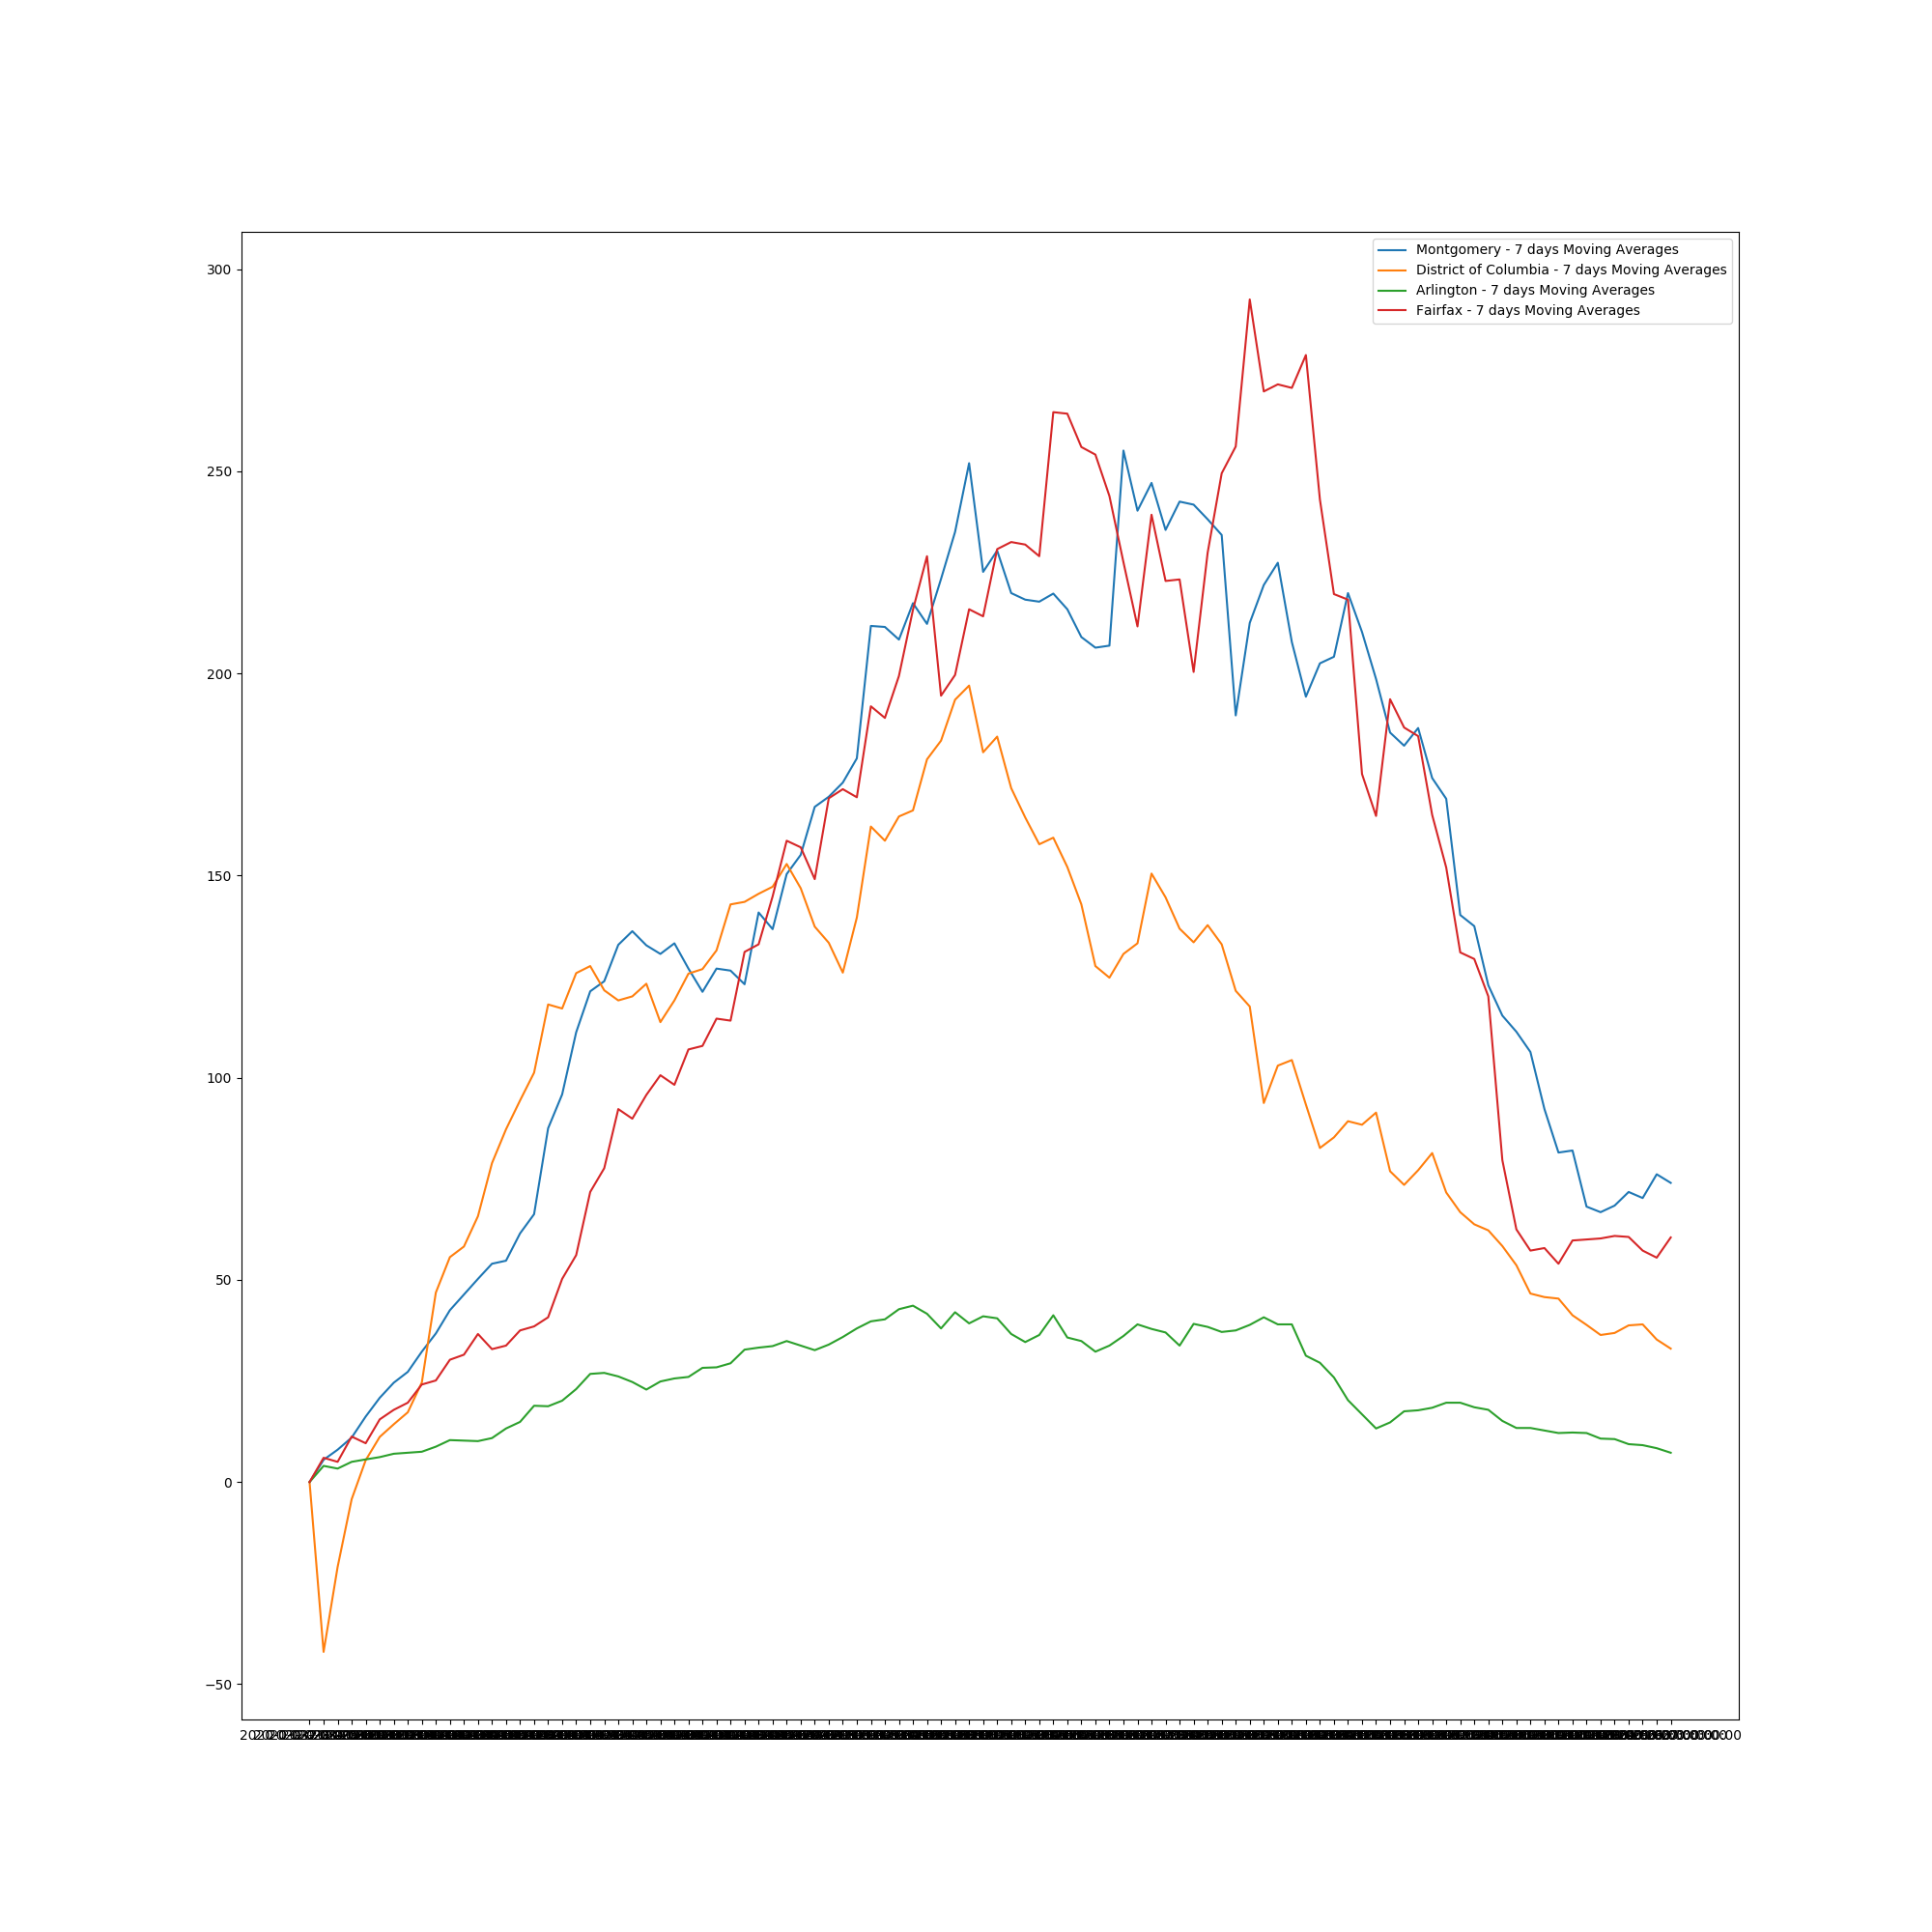

In [27]:
%matplot plt

In [28]:
import numpy as np
import matplotlib.ticker as ticker
import datetime
import pandas as pd

dates = df_dmv_movAvg_seven_p['date']
#print(dates)

datetimes = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]

df_datetimes = pd.DataFrame(dates, columns=['date'])
df_datetimes.loc[:, 'date'] = pd.to_datetime(df_datetimes['date'], format='%Y-%m-%d  %H:%M:%S')

#print(df_datetimes)

fig, ax = plt.subplots()
for index in df_dmv_counties_p.index:
  ax.plot(df_datetimes['date'], 'movingAverage', data=df_dmv_movAvg_seven_p.loc[df_dmv_movAvg_seven_p['county']==df_dmv_counties_p['county'][index]],label=df_dmv_counties_p['county'][index] + ' - 7 days Moving Averages')
plt.legend()
plt.show()
#dt_first = df_dmv_movAvg_seven_p.head(1)['date'].values[0]
#print(dt_first)
#dt_last = df_dmv_movAvg_seven_p.tail(1)['date'].values[0]
#print(dt_last)
#X = np.arange(np.datetime64(dt_first),np.datetime64(dt_last),np.timedelta64(5,'D'))

#X = np.linspace(dt_first, dt_last, 1024)
#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
#plt.plot(X, , df_dmv_movAvg_seven_p)
#plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

x and y must have same first dimension, but have shapes (392,) and (98,)
Traceback (most recent call last):
  File "/tmp/1595279025684-0/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py", line 1666, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/tmp/1595279025684-0/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py", line 225, in __call__
    yield from self._plot_args(this, kwargs)
  File "/tmp/1595279025684-0/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py", line 391, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/tmp/1595279025684-0/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py", line 270, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))
ValueError: x and y must have same first dimension, but have shapes (392,) and (98,)



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

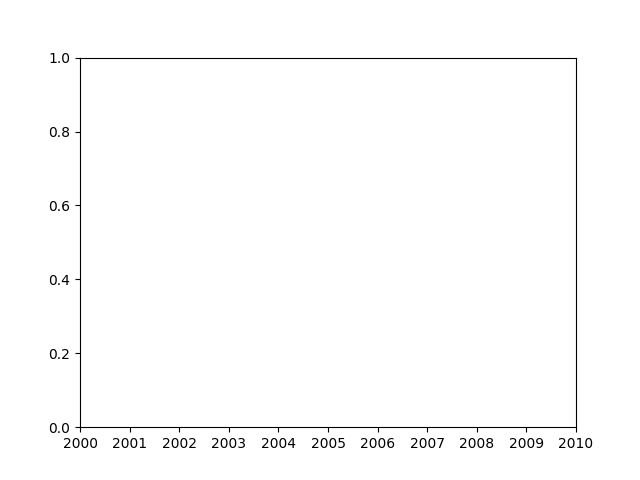

In [29]:
%matplot plt